In [10]:
import os

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
df = gpd.read_file('data/arctic_communities.geojson')
df

,admin,country,n_communities,geometry
0,United States of America,US,115,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
1,United Kingdom,GB,96,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."
2,Sweden,SE,133,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57..."
3,Russia,RU,774,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ..."
4,Norway,NO,48,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69..."
5,Lithuania,LT,26,"MULTIPOLYGON (((20.95781 55.27891, 20.89980 55..."
6,Latvia,LV,25,"POLYGON ((26.59355 55.66753, 26.54287 55.67241..."
7,Iceland,IS,5,"POLYGON ((-15.54312 66.22852, -15.42847 66.224..."
8,Finland,FI,99,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65..."
9,Estonia,EE,14,"MULTIPOLYGON (((27.35195 57.52813, 27.32656 57..."


In [3]:
df.explode(index_parts=False)

,admin,country,n_communities,geometry
0,United States of America,US,115,"POLYGON ((-132.74687 56.52568, -132.75762 56.5..."
0,United States of America,US,115,"POLYGON ((-132.77988 56.24727, -132.83096 56.2..."
0,United States of America,US,115,"POLYGON ((-134.31274 58.22891, -134.31987 58.2..."
0,United States of America,US,115,"POLYGON ((-145.11851 60.33711, -145.15049 60.3..."
0,United States of America,US,115,"POLYGON ((-144.56563 59.81841, -144.61357 59.8..."
...,...,...,...,...
13,Canada,CA,7,"POLYGON ((-109.16641 67.98237, -109.05391 67.9..."
13,Canada,CA,7,"POLYGON ((-108.09272 67.00518, -107.96646 66.9..."
13,Canada,CA,7,"POLYGON ((-109.32314 67.99087, -109.36084 67.9..."
13,Canada,CA,7,"POLYGON ((-139.04312 69.57690, -139.12573 69.5..."


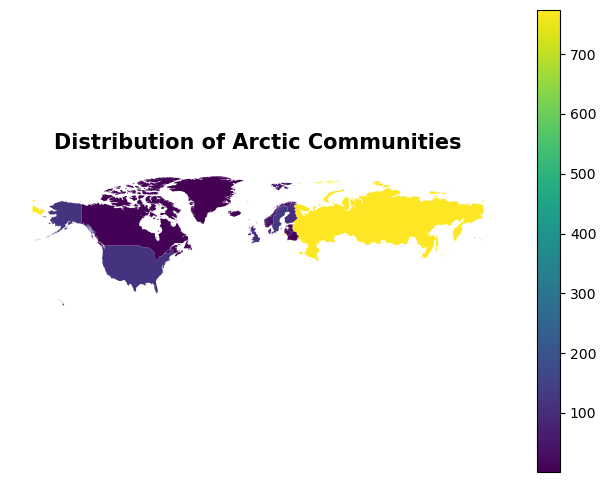

In [19]:
arctic = arctic.to_crs(epsg=3413)

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Plot your data
df.plot(
    ax=ax,
    column='n_communities',
    legend=True,
)        

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', 
             fontsize=15, 
             weight='bold', 
             pad=15
             )


plt.show()

In [12]:
df = df.explode(index_parts=False).reset_index(drop=True)
df

,admin,country,n_communities,geometry
0,United States of America,US,115,"POLYGON ((-132.74687 56.52568, -132.75762 56.5..."
1,United States of America,US,115,"POLYGON ((-132.77988 56.24727, -132.83096 56.2..."
2,United States of America,US,115,"POLYGON ((-134.31274 58.22891, -134.31987 58.2..."
3,United States of America,US,115,"POLYGON ((-145.11851 60.33711, -145.15049 60.3..."
4,United States of America,US,115,"POLYGON ((-144.56563 59.81841, -144.61357 59.8..."
...,...,...,...,...
476,Canada,CA,7,"POLYGON ((-109.16641 67.98237, -109.05391 67.9..."
477,Canada,CA,7,"POLYGON ((-108.09272 67.00518, -107.96646 66.9..."
478,Canada,CA,7,"POLYGON ((-109.32314 67.99087, -109.36084 67.9..."
479,Canada,CA,7,"POLYGON ((-139.04312 69.57690, -139.12573 69.5..."


In [24]:
df.geom_type[0]

'MultiPolygon'

In [13]:
def miny_bound(row):
    return row.geometry.bounds[1]

In [6]:
miny_bound(df.iloc[0])

56.511035156249996

In [7]:
row = df.iloc[0]
row.geometry.bounds[1]

56.511035156249996

In [25]:
row.geometry.bounds

(-132.948046875, 56.511035156249996, -132.56796875, 56.794775390625)

In [31]:
df.iloc[0]

admin                                     United States of America
country                                                         US
n_communities                                                  115
geometry         MULTIPOLYGON (((-132.746875 56.525683593749996...
Name: 0, dtype: object

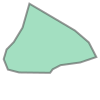

In [28]:
row.geometry

In [10]:
type(row.geometry)

shapely.geometry.polygon.Polygon

In [9]:
poly = df.iloc[[0]]
poly.total_bounds[1]

18.963916015625003

In [32]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
df['miny'] = df.apply(lambda row: row.geometry.bounds[1], axis=1)

In [15]:
arctic = df[df.miny >=40].to_crs('epsg:3857')

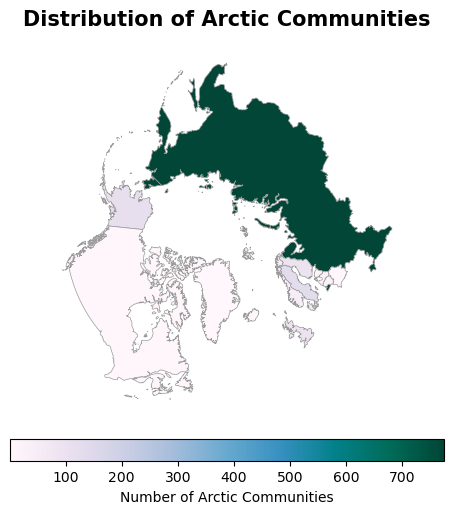

In [16]:
arctic = arctic.to_crs(epsg=3413)

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Plot your data
arctic.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)        

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', 
             fontsize=15, 
             weight='bold', 
             pad=15
             )


plt.show()

## Other ideas to extend this discussion section

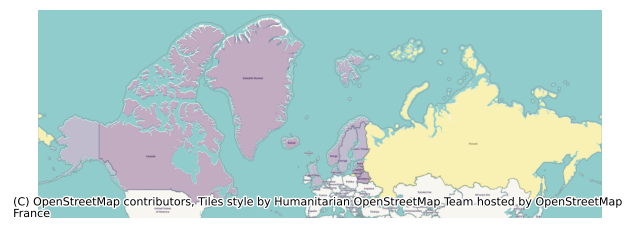

In [26]:
import contextily as ctx

# Ensure your GeoDataFrame is in the Web Mercator projection
arctic = arctic.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Plot your data
arctic.plot(ax=ax, column='n_communities', alpha=0.3)

# Add a basemap with a specified zoom level
ctx.add_basemap(ax, zoom=3)  # Adjust the zoom level as needed for your map extent

plt.show()

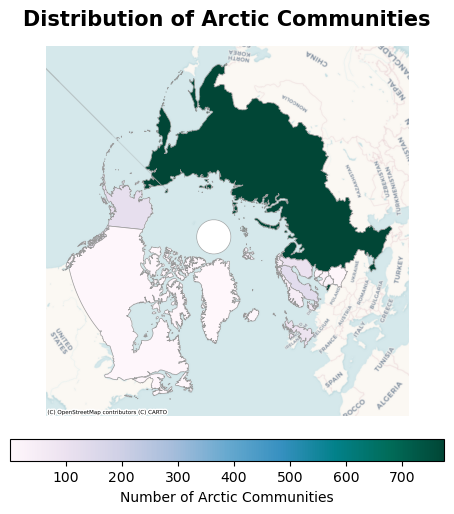

In [48]:
arctic = arctic.to_crs(epsg=3413)

fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Plot your data
arctic.plot(
    ax=ax,
    column='n_communities',
    cmap='PuBuGn',
    legend=True,
    edgecolor="0.6",
    linewidth=0.5,
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Arctic Communities",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add a basemap with a specified zoom level
ctx.add_basemap(ax, 
                source=ctx.providers.CartoDB.Voyager,
                crs=arctic.crs, 
                attribution_size=4,
                zoom=3
                )                  

# Add title and subtitle for better context
ax.set_title('Distribution of Arctic Communities', 
             fontsize=15, 
             weight='bold', 
             pad=15
             )


plt.show()